# Modeling

## Naive Bayes

In [ ]:
# 기본

nb = GaussianNB()
nb.fit(X_train,y_train)

nb_prediction = nb.predict(X_test_scaled)
cm_nb = confusion_matrix(y_test, nb_prediction)
df_nb = pd.DataFrame(data=[f1_score(y_test, nb_prediction), recall_score(y_test, nb_prediction),
                   precision_score(y_test, nb_prediction), accuracy_score(y_test, nb_prediction), 
                   roc_auc_score(y_test, nb_prediction)],
             columns=['Naive Bayes Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_nb

,Naive Bayes Score
F1 Score,0.469136
Recall,0.759021
Precision,0.339481
Accuracy,0.565232
ROC AUC Score,0.629292


In [ ]:
# 그리드 서치를 사용하여 최적의 매개변수를 찾기

params_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6], # 1e-9
    'priors': [None, [0.75,0.25], [0.5,0.5], [0.25, 0.75]] # None
}

# Initialize the GridSearchCV
nb_t = GridSearchCV(nb, params_grid, cv=5, scoring='f1')
nb_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", nb_t.best_params_)

# Predictions and evaluation
nb_t_prediction = nb_t.predict(X_test_scaled)
cm_nb_t = confusion_matrix(y_test, nb_t_prediction)
df_nb_t = pd.DataFrame(data=[f1_score(y_test, nb_t_prediction), recall_score(y_test, nb_t_prediction),
                   precision_score(y_test, nb_t_prediction), accuracy_score(y_test, nb_t_prediction), 
                   roc_auc_score(y_test, nb_t_prediction)],
             columns=['Tuned Naive Bayes Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_nb_t

Best Parameters:  {'priors': [0.25, 0.75], 'var_smoothing': 1e-09}


,Tuned Naive Bayes Score
F1 Score,0.489967
Recall,0.676546
Precision,0.384053
Accuracy,0.643509
ROC AUC Score,0.654430


## AdaBoost

In [ ]:
# 기본

adab = AdaBoostClassifier()
adab.fit(X_train,y_train)

adab_prediction = adab.predict(X_test_scaled)
cm_adab = confusion_matrix(y_test, adab_prediction)
df_adab = pd.DataFrame(data=[f1_score(y_test, adab_prediction), recall_score(y_test, adab_prediction),
                   precision_score(y_test, adab_prediction), accuracy_score(y_test, adab_prediction), 
                   roc_auc_score(y_test, adab_prediction)],
             columns=['AdaBoost Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_adab

,AdaBoost Score
F1 Score,0.404071
Recall,0.511598
Precision,0.333894
Accuracy,0.618069
ROC AUC Score,0.582873


In [ ]:
# 그리드 서치를 사용하여 최적의 매개변수를 찾기
# 파라미터 4개 모두

params_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500], # 50
    'learning_rate': [0.01, 0.1, 0.5, 1.0], # 1.0
    'algorithm': ['SAMME', 'SAMME.R'], # SAMME.R
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)] # DecisionTreeClassifier(max_depth=1)
}

# Initialize the GridSearchCV
adab_t = GridSearchCV(adab, params_grid, cv=5, scoring='f1')
adab_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", adab_t.best_params_)

# Predictions and evaluation
xgb_t_prediction = adab_t.predict(X_test_scaled)
cm_xgb_t = confusion_matrix(y_test, xgb_t_prediction)       ## 코드 오는 있지만 문제는 없음 (xgboost 아님, 코드 돌릴 때는상관은 없음)
df_xgb_t = pd.DataFrame(data=[f1_score(y_test, xgb_t_prediction), recall_score(y_test, xgb_t_prediction),
                   precision_score(y_test, xgb_t_prediction), accuracy_score(y_test, xgb_t_prediction), 
                   roc_auc_score(y_test, xgb_t_prediction)],
             columns=['Tuned AdaBoost Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_xgb_t

Best Parameters:  {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 500}


,Tuned AdaBoost Score
F1 Score,0.615819
Recall,0.702320
Precision,0.548290
Accuracy,0.778213
ROC AUC Score,0.753125


# Test Data

In [ ]:
test_data(nb, nb_t)

Model result
[[1399 1460]
 [ 218  755]]
               GaussianNB() Score
F1 Score                 0.473651
Recall                   0.775951
Precision                0.340858
Accuracy                 0.562109
ROC AUC Score            0.632641
Tuned Model result
[[1817 1042]
 [ 273  700]]
               Tuned GridSearchCV(cv=5, estimator=GaussianNB(),\n             param_grid={'priors': [None, [0.75, 0.25], [0.5, 0.5],\n                                    [0.25, 0.75]],\n                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},\n             scoring='f1') Score
F1 Score                                                0.515654                                                                                                                                                                                                                                    
Recall                                                  0.719424                                                            

In [ ]:
test_data(adab, adab_t.best_estimator_)

Model result
[[1849 1010]
 [ 433  540]]
               AdaBoostClassifier() Score
F1 Score                         0.428062
Recall                           0.554985
Precision                        0.348387
Accuracy                         0.623434
ROC AUC Score                    0.600857
Tuned Model result
[[2339  520]
 [ 287  686]]
               Tuned AdaBoostClassifier(algorithm='SAMME',\n                   base_estimator=DecisionTreeClassifier(max_depth=2),\n                   learning_rate=0.5, n_estimators=500) Score
F1 Score                                                0.629647                                                                                                                                 
Recall                                                  0.705036                                                                                                                                 
Precision                                               0.568823                

linearSVC, SVC_sigmoid, SVC_poly, SVC_rbf, SVC_linear, dtree, rfc, logistic, knn, xgb, adab, nb

# Feature Importance 코드

### Naive Bayse

In [ ]:
## 기본모델

# 회귀 계수 추출 및 특성 중요도 계산
importances = adab.feature_importances_

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance  \
0                       city_development_index        0.32   
5                               training_hours        0.20   
2                                   experience        0.08   
3                                 company_size        0.08   
1                              education_level        0.06   
4                                 last_new_job        0.04   
7                           experience_over_20        0.04   
11           enrolled_university_No Enrollment        0.04   
27  relevent_experience_No relevent experience        0.02   
26                        company_type_Unknown        0.02   
25                     company_type_Unemployed        0.02   
23                  company_type_Public Sector        0.02   
17                      major_discipline_Other        0.02   
30                        last_new_job_Unknown        0.02   
6                           experience_under_1   

In [ ]:
# 0.00인 특성 제거
importance_df_filtered = importance_df[importance_df['Importance'] != 0.00]

# 결과 출력
print("\nNon-zero Feature Importance:")
print(importance_df_filtered)


Non-zero Feature Importance:
                                       Feature  Importance  \
0                       city_development_index        0.32   
5                               training_hours        0.20   
2                                   experience        0.08   
3                                 company_size        0.08   
1                              education_level        0.06   
4                                 last_new_job        0.04   
7                           experience_over_20        0.04   
11           enrolled_university_No Enrollment        0.04   
27  relevent_experience_No relevent experience        0.02   
26                        company_type_Unknown        0.02   
25                     company_type_Unemployed        0.02   
23                  company_type_Public Sector        0.02   
17                      major_discipline_Other        0.02   
30                        last_new_job_Unknown        0.02   
6                           experience_u

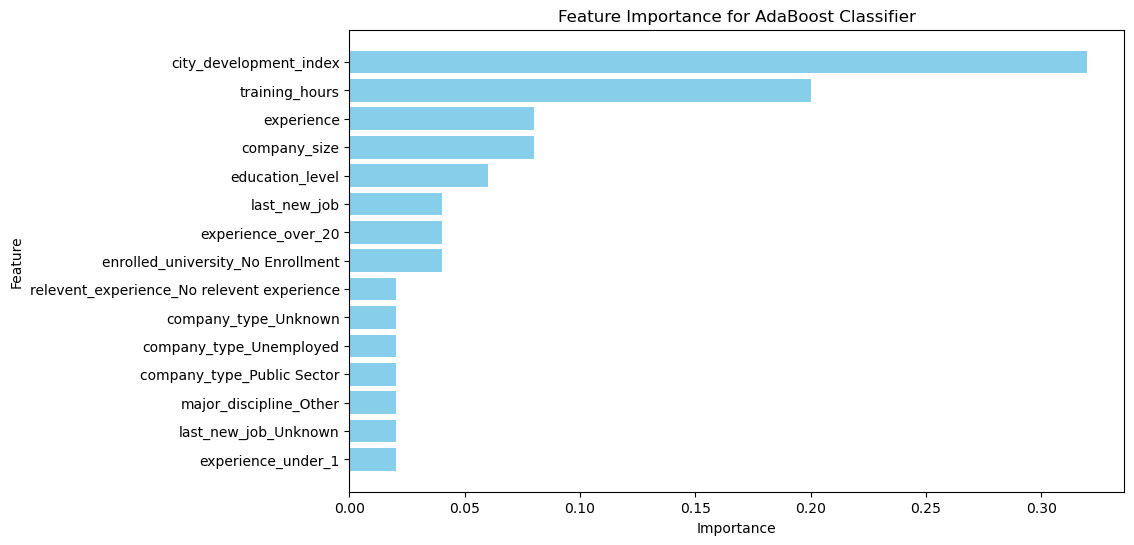

In [ ]:
# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_filtered['Feature'], importance_df_filtered['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for AdaBoost Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()

### Adaboost

In [ ]:
## 파라미터 4개

# 최적의 모델을 얻은 후
best_model_par4 = adab_t.best_estimator_

# 회귀 계수 추출 및 특성 중요도 계산
importances_par4 = best_model_par4.feature_importances_

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df_par4 = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances_par4
})

# 계수의 절대값 기준으로 정렬
importance_df_par4['Absolute Importance'] = importance_df_par4['Importance'].abs()
importance_df_par4 = importance_df_par4.sort_values(by='Absolute Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df_par4)


Feature Importance:
                                       Feature  Importance  \
0                       city_development_index    0.267438   
4                                 last_new_job    0.204876   
1                              education_level    0.155239   
2                                   experience    0.151486   
3                                 company_size    0.147967   
5                               training_hours    0.017315   
27  relevent_experience_No relevent experience    0.012094   
7                           experience_over_20    0.007286   
26                        company_type_Unknown    0.006148   
19                    major_discipline_Unknown    0.006009   
24                        company_type_Pvt Ltd    0.005636   
18                       major_discipline_STEM    0.005580   
11           enrolled_university_No Enrollment    0.005057   
9                                  gender_Male    0.002004   
10                                gender_Other   

In [ ]:
# 0.00인 특성 제거
importance_df_par4_filtered = importance_df_par4[importance_df_par4['Importance'] != 0.00]

# 결과 출력
print("\nNon-zero Feature Importance:")
print(importance_df_par4_filtered)


Non-zero Feature Importance:
                                       Feature  Importance  \
0                       city_development_index    0.267438   
4                                 last_new_job    0.204876   
1                              education_level    0.155239   
2                                   experience    0.151486   
3                                 company_size    0.147967   
5                               training_hours    0.017315   
27  relevent_experience_No relevent experience    0.012094   
7                           experience_over_20    0.007286   
26                        company_type_Unknown    0.006148   
19                    major_discipline_Unknown    0.006009   
24                        company_type_Pvt Ltd    0.005636   
18                       major_discipline_STEM    0.005580   
11           enrolled_university_No Enrollment    0.005057   
9                                  gender_Male    0.002004   
10                                gender

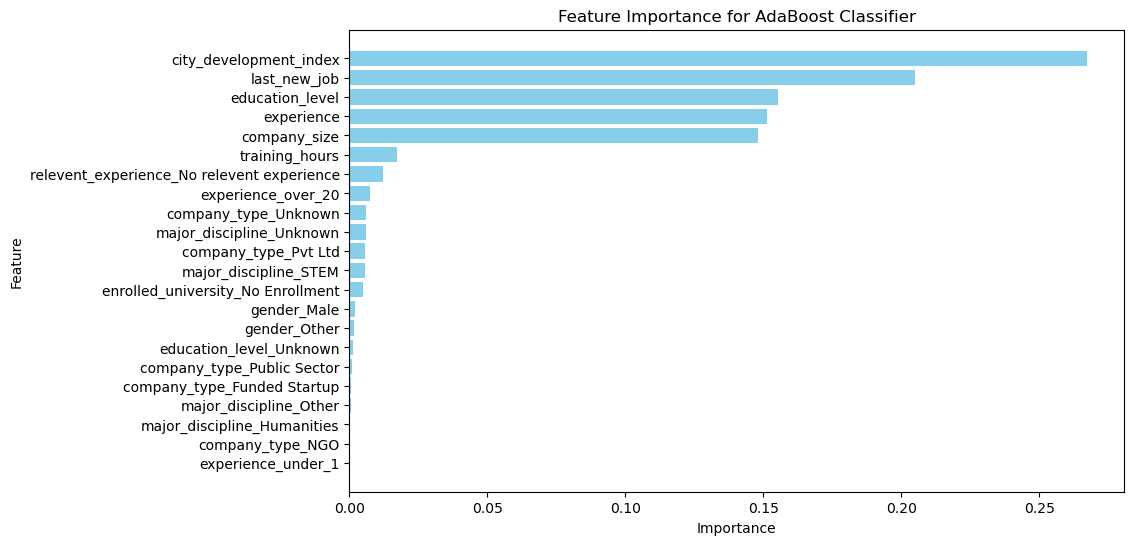

In [ ]:
# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_par4_filtered['Feature'], importance_df_par4_filtered['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for AdaBoost Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()